# Plot di FWHM su temperatura dei picchi reference

In [6]:
from picchi import raccoglitore_1 # picchi reference
from varshni_subroutines import *

d_o_emi = ['emi=0', 'emi=0o5', 'emi=1', 'emi=1o5', 'emi=2', 'emi=2o5', 'emi=3']#, '3o5']
d_o_ass = ['ass=0', 'ass=1']
arr_temperatura = [15, 30, 45, 70, 100, 150]

### Estraggo le sigma e converto in FWHM

In [7]:
# i picchi vengono raccolti in data
# la key [ass][emi] contiene:
# [0] - lista delle sigma dei picchi sx
# [1] - lista delle sigma dei picchi dx

data = {}

sigma è la terza entrata della tripla che contiene le informazioni su un picco

In [8]:
for ass in d_o_ass:
    
    data[ass] = {}
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        data[ass][emi] = []
        arr_sigma_sx  = [] # contiene le sigma del picco (una per ogni T)
        arr_sigma_dx  = []
        
        # Ciclo sulla temperatura
        for i in range(len(arr_temperatura)):
            
            if len(raccoglitore_1[ass][emi][i]['Regione 1']) > 0:
                sigma_sx = raccoglitore_1[ass][emi][i]['Regione 1'][0][2]
            else:
                sigma_sx = 0
                
            if len(raccoglitore_1[ass][emi][i]['Regione 2']) > 0:
                
                sigma_dx = raccoglitore_1[ass][emi][i]['Regione 2'][0][2]
                
            else:
                sigma_dx = 0
               
            # conversione sigma fwhm
            fwhm_sx = sigma_sx * 2.35482004503 # 2*sqrt( 2*ln(2) )
            fwhm_dx = sigma_dx * 2.35482004503
            
            # liste provvisorie 
            arr_sigma_sx.append(fwhm_sx)
            arr_sigma_dx.append(fwhm_dx)   
            
        # riempimento del contenitore data    
        data[ass][emi].append(arr_sigma_sx)
        data[ass][emi].append(arr_sigma_dx)
            
                        

L'idea è che in ogni data[ass][emi] l'entrata [0] sono le 6 fwhm del picco di sx (una per ciascuna T) e l'entrata [1] è la lista delle 6 fwhm del picco di dx.

## Plot (fit?)

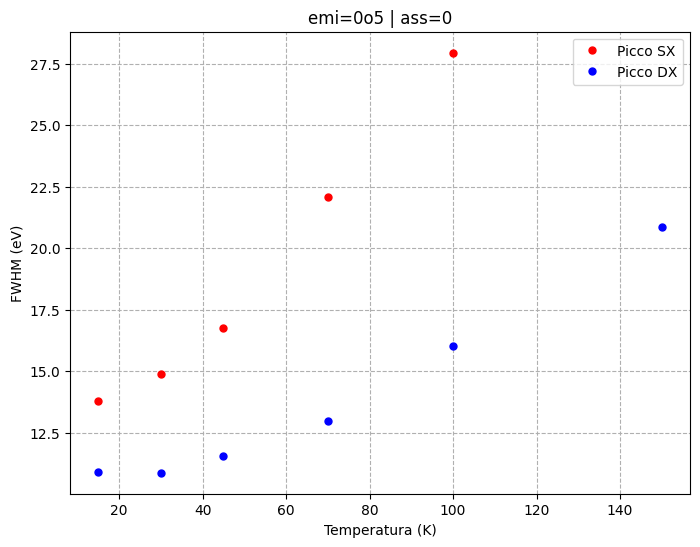

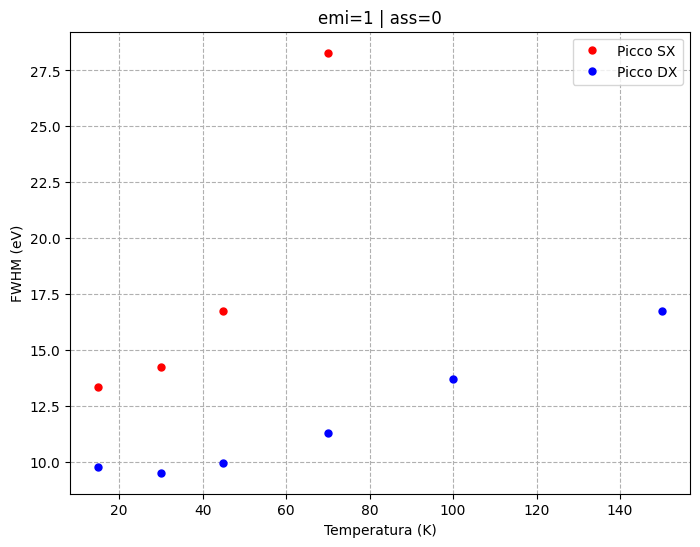

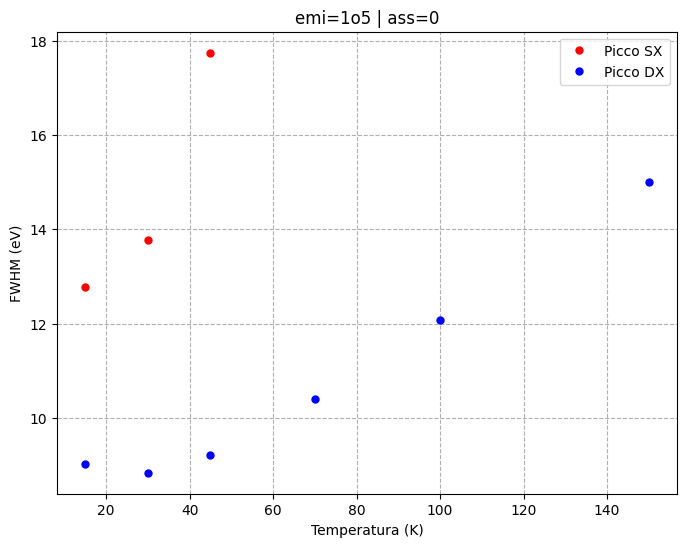

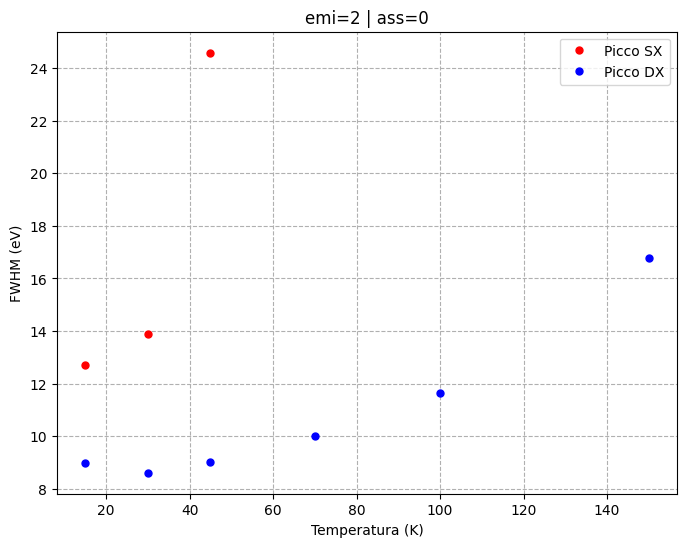

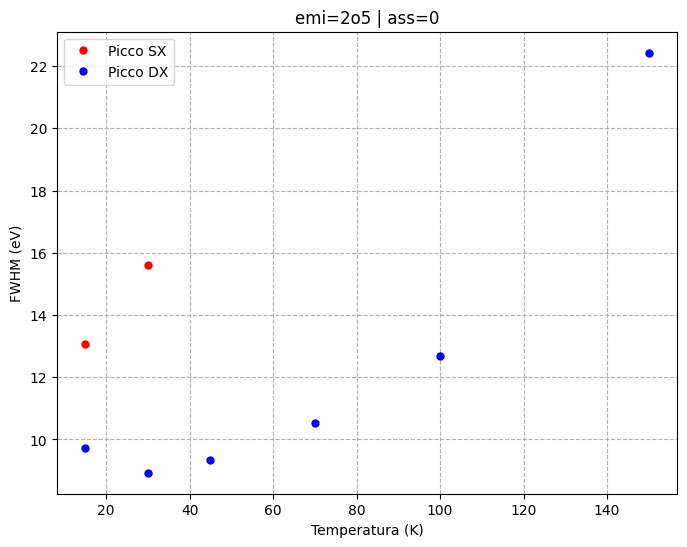

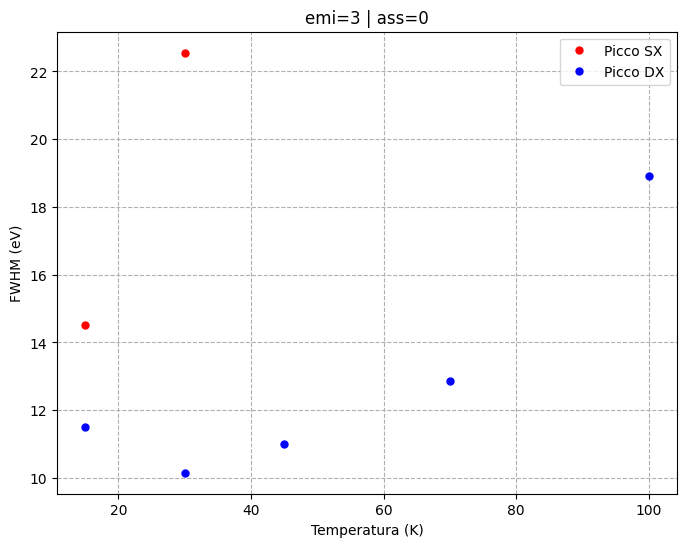

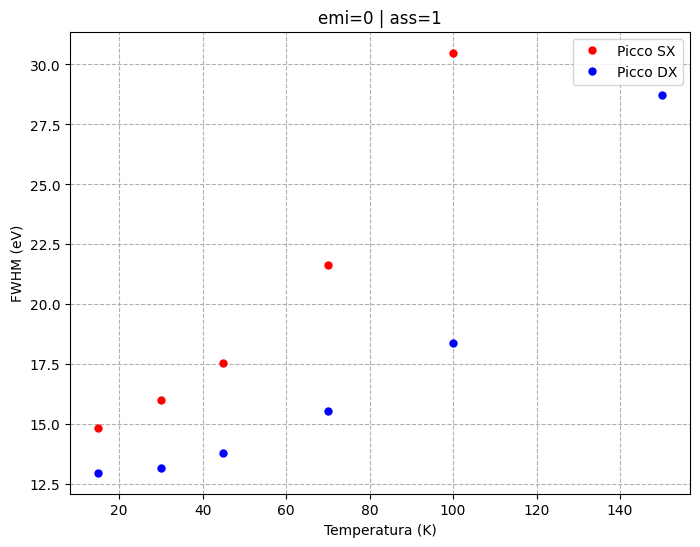

In [10]:
for ass in d_o_ass:
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        # in ascissa va la temperatura
        x1 = arr_temperatura
        x2 = arr_temperatura
        
        # picco sx
        y1 = data[ass][emi][0]
        # picco dx
        y2 = data[ass][emi][1]
        
        # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
        x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0]
        y1 = [y_val for y_val in y1 if y_val != 0]
        
        x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
        y2 = [y_val for y_val in y2 if y_val != 0]
        
        plt.figure(figsize=(8, 6))
        
        # Plot del primo picco e del suo fit
        plt.errorbar(x1, y1, yerr=0, fmt='ro', label='Picco SX', markersize=5, elinewidth=0, capsize=0)
        #plt.plot(x_fit, varshni(x_fit, *popt1), 'r-', linewidth=1, label='Fit Picco SX')

        # Plot del secondo picco e del suo fit
        plt.errorbar(x2, y2, yerr=0, fmt='bo', label='Picco DX', markersize=5, elinewidth=0, capsize=0)
        #plt.plot(x_fit, varshni(x_fit, *popt2), 'b-', linewidth=1, label='Fit Picco DX')

        # Aggiungere etichette e legenda
        plt.title(emi + ' | ' + ass)
        plt.xlabel('Temperatura (K)')
        plt.ylabel('FWHM (eV)')
        plt.grid(linestyle='--')
        plt.legend()

        # Mostrare il grafico
        plt.show()
        
        